In [118]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


## Data Loading

In [119]:
df = pd.read_csv("VS17MORT.csv", low_memory=False, nrows=10000) # Mortality dataset's DATAFRAME

In [120]:
df.head(5)

,Resident_Status,Education,Month_Of_Death,Sex,Age_Key,Age_Value,Age_Sub_Flag,Age_Recode_52,Age_Recode_27,Age_Recode_12,...,RA18,RA19,RA20,Race,Race_Bridged,Race_Imputation,Race_Recode_3,Race_Recode_5,Hispanic_Origin,Hispanic_Origin_Recode
0,1,,101,M,1,71,,40,20,9,...,,,,1,,,1,1,100,6
1,1,,101,M,1,74,,40,20,9,...,,,,1,,,1,1,100,6
2,1,,101,M,1,59,,37,17,8,...,,,,1,,,1,1,100,6
3,1,,101,M,1,90,,44,24,11,...,,,,3,,,2,3,100,8
4,1,,101,M,1,66,,39,19,9,...,,,,1,,,1,1,100,6


In [121]:
df.shape

(10000, 75)

In [122]:
df.columns

Index(['Resident_Status', ' Education', ' Month_Of_Death', ' Sex', ' Age_Key',
       ' Age_Value', ' Age_Sub_Flag', ' Age_Recode_52', ' Age_Recode_27',
       ' Age_Recode_12', ' Infant_Age_Recode_22', ' Place_Of_Death',
       ' Marital_Status', ' DOW_of_Death', ' Data_Year', ' Injured_At_Work',
       ' Manner_Of_Death', ' Method_Of_Disposition', ' Autopsy',
       ' Activity_Code', ' Place_Of_Causal_Injury', '  ICD10',
       ' Cause_Recode_358', ' Cause_Recode_113', ' Infant_Cause_Recode_130',
       ' Cause_Recode_39', ' Entity_Axis_Conditions', ' EAC1', ' EAC2',
       ' EAC3', ' EAC4', ' EAC5', ' EAC6', ' EAC7', ' EAC8', ' EAC9', ' EAC10',
       ' EAC11', ' EAC12', ' EAC13', ' EAC14', ' EAC15', ' EAC16', ' EAC17',
       ' EAC18', ' EAC19', ' EAC20', ' Record_Axis_Conditions', ' RA1', ' RA2',
       ' RA3', ' RA4', ' RA5', ' RA6', ' RA7', ' RA8', ' RA9', ' RA10',
       ' RA11', ' RA12', ' RA13', ' RA14', ' RA15', ' RA16', ' RA17', ' RA18',
       ' RA19', ' RA20', ' Race', ' 

In [123]:
df = df.drop(columns=[" Education"])

## Data Cleaning

In [124]:
def removeSpaces(item):
    regex = re.compile("\S+")
    return regex.findall(item)[0] if type(item) == str else item

def cleanColumns(dataFrame):
    return dataFrame.rename(columns=lambda x: removeSpaces(x))

In [125]:
df = cleanColumns(df)

In [126]:
df.columns

Index(['Resident_Status', 'Month_Of_Death', 'Sex', 'Age_Key', 'Age_Value',
       'Age_Sub_Flag', 'Age_Recode_52', 'Age_Recode_27', 'Age_Recode_12',
       'Infant_Age_Recode_22', 'Place_Of_Death', 'Marital_Status',
       'DOW_of_Death', 'Data_Year', 'Injured_At_Work', 'Manner_Of_Death',
       'Method_Of_Disposition', 'Autopsy', 'Activity_Code',
       'Place_Of_Causal_Injury', 'ICD10', 'Cause_Recode_358',
       'Cause_Recode_113', 'Infant_Cause_Recode_130', 'Cause_Recode_39',
       'Entity_Axis_Conditions', 'EAC1', 'EAC2', 'EAC3', 'EAC4', 'EAC5',
       'EAC6', 'EAC7', 'EAC8', 'EAC9', 'EAC10', 'EAC11', 'EAC12', 'EAC13',
       'EAC14', 'EAC15', 'EAC16', 'EAC17', 'EAC18', 'EAC19', 'EAC20',
       'Record_Axis_Conditions', 'RA1', 'RA2', 'RA3', 'RA4', 'RA5', 'RA6',
       'RA7', 'RA8', 'RA9', 'RA10', 'RA11', 'RA12', 'RA13', 'RA14', 'RA15',
       'RA16', 'RA17', 'RA18', 'RA19', 'RA20', 'Race', 'Race_Bridged',
       'Race_Imputation', 'Race_Recode_3', 'Race_Recode_5', 'Hispanic_Origi

In [127]:
def cleanEmptyStringValues(_df):
    return _df.applymap(lambda x: x if str(x) != ' ' else None)

In [128]:
df = cleanEmptyStringValues(df)

In [129]:
def fixStringValues(_df):
    return _df.applymap(lambda x: removeSpaces(x))

In [130]:
df = fixStringValues(df)

In [131]:
def replaceNAWithMode(_df):
    for column in _df.columns:
        try:
            _mode = _df[column].mode()[0]
            _df[column] = _df[column].fillna(_mode)
        except:
            pass
    return _df

In [132]:
df = replaceNAWithMode(df)

In [133]:
df = df.drop(columns=[x for x in df.columns if df[x].unique()[0] == None])

In [134]:
df.columns

Index(['Resident_Status', 'Month_Of_Death', 'Sex', 'Age_Key', 'Age_Value',
       'Age_Recode_52', 'Age_Recode_27', 'Age_Recode_12',
       'Infant_Age_Recode_22', 'Place_Of_Death', 'Marital_Status',
       'DOW_of_Death', 'Data_Year', 'Injured_At_Work', 'Manner_Of_Death',
       'Method_Of_Disposition', 'Autopsy', 'Activity_Code',
       'Place_Of_Causal_Injury', 'ICD10', 'Cause_Recode_358',
       'Cause_Recode_113', 'Infant_Cause_Recode_130', 'Cause_Recode_39',
       'Entity_Axis_Conditions', 'EAC1', 'EAC2', 'EAC3', 'EAC4', 'EAC5',
       'EAC6', 'EAC7', 'EAC8', 'EAC9', 'EAC10', 'EAC11', 'EAC12', 'EAC13',
       'Record_Axis_Conditions', 'RA1', 'RA2', 'RA3', 'RA4', 'RA5', 'RA6',
       'RA7', 'RA8', 'RA9', 'RA10', 'RA11', 'RA12', 'RA13', 'Race',
       'Race_Bridged', 'Race_Imputation', 'Race_Recode_3', 'Race_Recode_5',
       'Hispanic_Origin', 'Hispanic_Origin_Recode'],
      dtype='object')

In [135]:
# df.apply(lambda x: x if str(x) != ' ' else 0)["Activity_Code"][0]

In [136]:
df.columns

Index(['Resident_Status', 'Month_Of_Death', 'Sex', 'Age_Key', 'Age_Value',
       'Age_Recode_52', 'Age_Recode_27', 'Age_Recode_12',
       'Infant_Age_Recode_22', 'Place_Of_Death', 'Marital_Status',
       'DOW_of_Death', 'Data_Year', 'Injured_At_Work', 'Manner_Of_Death',
       'Method_Of_Disposition', 'Autopsy', 'Activity_Code',
       'Place_Of_Causal_Injury', 'ICD10', 'Cause_Recode_358',
       'Cause_Recode_113', 'Infant_Cause_Recode_130', 'Cause_Recode_39',
       'Entity_Axis_Conditions', 'EAC1', 'EAC2', 'EAC3', 'EAC4', 'EAC5',
       'EAC6', 'EAC7', 'EAC8', 'EAC9', 'EAC10', 'EAC11', 'EAC12', 'EAC13',
       'Record_Axis_Conditions', 'RA1', 'RA2', 'RA3', 'RA4', 'RA5', 'RA6',
       'RA7', 'RA8', 'RA9', 'RA10', 'RA11', 'RA12', 'RA13', 'Race',
       'Race_Bridged', 'Race_Imputation', 'Race_Recode_3', 'Race_Recode_5',
       'Hispanic_Origin', 'Hispanic_Origin_Recode'],
      dtype='object')

In [137]:
df.head()

,Resident_Status,Month_Of_Death,Sex,Age_Key,Age_Value,Age_Recode_52,Age_Recode_27,Age_Recode_12,Infant_Age_Recode_22,Place_Of_Death,...,RA11,RA12,RA13,Race,Race_Bridged,Race_Imputation,Race_Recode_3,Race_Recode_5,Hispanic_Origin,Hispanic_Origin_Recode
0,1,101,M,1,71,40,20,9,02,1,...,R688,J969,R068,1,1,2,1,1,100,6
1,1,101,M,1,74,40,20,9,02,1,...,R688,J969,R068,1,1,2,1,1,100,6
2,1,101,M,1,59,37,17,8,02,4,...,R688,J969,R068,1,1,2,1,1,100,6
3,1,101,M,1,90,44,24,11,02,4,...,R688,J969,R068,3,1,2,2,3,100,8
4,1,101,M,1,66,39,19,9,02,4,...,R688,J969,R068,1,1,2,1,1,100,6


In [138]:
df.tail()

,Resident_Status,Month_Of_Death,Sex,Age_Key,Age_Value,Age_Recode_52,Age_Recode_27,Age_Recode_12,Infant_Age_Recode_22,Place_Of_Death,...,RA11,RA12,RA13,Race,Race_Bridged,Race_Imputation,Race_Recode_3,Race_Recode_5,Hispanic_Origin,Hispanic_Origin_Recode
9995,1,102,F,1,71,40,20,9,02,6,...,R688,J969,R068,1,1,2,1,1,100,6
9996,2,101,M,1,75,41,21,10,02,1,...,R688,J969,R068,1,1,2,1,1,100,6
9997,1,102,F,1,82,42,22,10,02,6,...,R688,J969,R068,1,1,2,1,1,100,6
9998,1,102,F,1,80,42,22,10,02,1,...,R688,J969,R068,1,1,2,1,1,100,6
9999,1,102,M,1,51,36,16,7,02,1,...,R688,J969,R068,1,1,2,1,1,100,6


## Descriptive Statistics

In [139]:
for column in df.columns:
    try:
        mean = df[column].mean()
        if mean > 0:
            print(df[column].describe())
    except:
        pass

count    10000.000000
mean         1.200200
std          0.467912
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: Resident_Status, dtype: float64
count    10000.000000
mean       103.534100
std          3.522169
min        101.000000
25%        101.000000
50%        102.000000
75%        106.000000
max        112.000000
Name: Month_Of_Death, dtype: float64
count    10000.000000
mean         1.020900
std          0.272159
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          9.000000
Name: Age_Key, dtype: float64
count    10000.000000
mean        69.597400
std         24.977292
min          1.000000
25%         59.000000
50%         73.000000
75%         84.000000
max        999.000000
Name: Age_Value, dtype: float64
count    10000.000000
mean        39.306800
std          4.640369
min          1.000000
25%         37.000000
50%         40.000000
75%         42.000000
max  

In [140]:
Q1 = df["Age_Value"].quantile(0.25)
Q3 = df["Age_Value"].quantile(0.75)

print("INTER-QUARTILE RANGE (IQR) For Age:", Q3-Q1)

INTER-QUARTILE RANGE (IQR) For Age: 25.0


## Exploratry Statictics

### If married people die more than unmarried

In [161]:
dfMarried = df[(df['Marital_Status'] == 'M') ]

In [162]:
dfSingle = df[(df['Marital_Status'] == 'S') ]

In [163]:
dfWidow = df[(df['Marital_Status'] == 'W') ]

In [164]:
dfDivorce = df[(df['Marital_Status'] == 'D') ]

In [165]:
dfUnknown = df[(df['Marital_Status'] == 'U') ]

In [166]:
marriedPer = dfMarried.shape[0] / df.shape[0] * 100
str(round(marriedPer, 2)) + ' %'

'36.94 %'

In [167]:
singlePer = dfSingle.shape[0] / df.shape[0] * 100
str(round(singlePer, 2)) + ' %'

'14.67 %'

In [168]:
widowPer = dfWidow.shape[0] / df.shape[0] * 100
str(round(widowPer, 2)) + ' %'

'28.89 %'

In [169]:
divorcePer = dfDivorce.shape[0] / df.shape[0] * 100
str(round(divorcePer, 2)) + ' %'

'18.45 %'

In [170]:
unknownPer = dfUnknown.shape[0] / df.shape[0] * 100
str(round(unknownPer, 2)) + ' %'

'1.05 %'

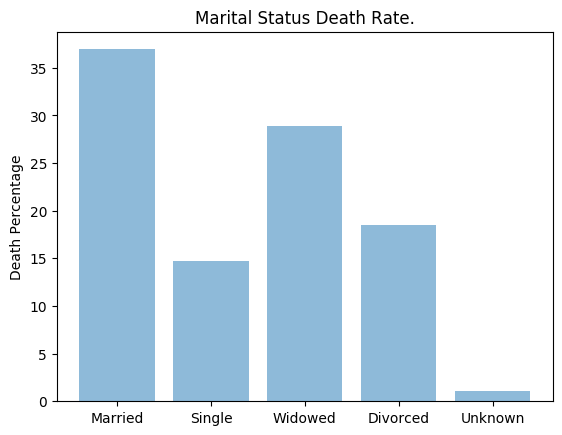

In [171]:

objects = ('Married', 'Single', 'Widowed', 'Divorced', 'Unknown')
y_pos = np.arange(len(objects))
percentages = [marriedPer, singlePer, widowPer, divorcePer, unknownPer]

plt.bar(y_pos, percentages, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Death Percentage')
plt.title('Marital Status Death Rate.')

plt.show();

### what are and will be the most common causes of death

In [172]:
df.columns

Index(['Resident_Status', 'Month_Of_Death', 'Sex', 'Age_Key', 'Age_Value',
       'Age_Recode_52', 'Age_Recode_27', 'Age_Recode_12',
       'Infant_Age_Recode_22', 'Place_Of_Death', 'Marital_Status',
       'DOW_of_Death', 'Data_Year', 'Injured_At_Work', 'Manner_Of_Death',
       'Method_Of_Disposition', 'Autopsy', 'Activity_Code',
       'Place_Of_Causal_Injury', 'ICD10', 'Cause_Recode_358',
       'Cause_Recode_113', 'Infant_Cause_Recode_130', 'Cause_Recode_39',
       'Entity_Axis_Conditions', 'EAC1', 'EAC2', 'EAC3', 'EAC4', 'EAC5',
       'EAC6', 'EAC7', 'EAC8', 'EAC9', 'EAC10', 'EAC11', 'EAC12', 'EAC13',
       'Record_Axis_Conditions', 'RA1', 'RA2', 'RA3', 'RA4', 'RA5', 'RA6',
       'RA7', 'RA8', 'RA9', 'RA10', 'RA11', 'RA12', 'RA13', 'Race',
       'Race_Bridged', 'Race_Imputation', 'Race_Recode_3', 'Race_Recode_5',
       'Hispanic_Origin', 'Hispanic_Origin_Recode'],
      dtype='object')

0       True
1       True
2       True
3       True
4       True
        ... 
9995    True
9996    True
9997    True
9998    True
9999    True
Name: Manner_Of_Death, Length: 10000, dtype: bool

In [180]:
manner1 = df[(df['Manner_Of_Death'] == '1') ]
manner1Per = manner1.shape[0] / df['Manner_Of_Death'].shape[0] * 100;
str(round(manner1Per, 2)) + ' %'

'6.61 %'

In [181]:
manner2 = df[(df['Manner_Of_Death'] == '2') ]
manner2Per = manner2.shape[0] / df['Manner_Of_Death'].shape[0] * 100;
str(round(manner2Per, 2)) + ' %'

'2.94 %'

In [182]:
manner3 = df[(df['Manner_Of_Death'] == '3') ]
manner3Per = manner3.shape[0] / df['Manner_Of_Death'].shape[0] * 100;
str(round(manner3Per, 2)) + ' %'

'1.22 %'

In [183]:
manner4 = df[(df['Manner_Of_Death'] == '4') ]
manner4Per = manner4.shape[0] / df['Manner_Of_Death'].shape[0] * 100;
str(round(manner4Per, 2)) + ' %'

'0.03 %'

In [184]:
manner5 = df[(df['Manner_Of_Death'] == '5') ]
manner5Per = manner5.shape[0] / df['Manner_Of_Death'].shape[0] * 100;
str(round(manner5Per, 2)) + ' %'

'0.91 %'

In [185]:
manner6 = df[(df['Manner_Of_Death'] == '6') ]
manner6Per = manner6.shape[0] / df['Manner_Of_Death'].shape[0] * 100;
str(round(manner6Per, 2)) + ' %'

'0.0 %'

In [186]:
manner7 = df[(df['Manner_Of_Death'] == '7') ]
manner7Per = manner7.shape[0] / df['Manner_Of_Death'].shape[0] * 100;
str(round(manner7Per, 2)) + ' %'

'88.29 %'

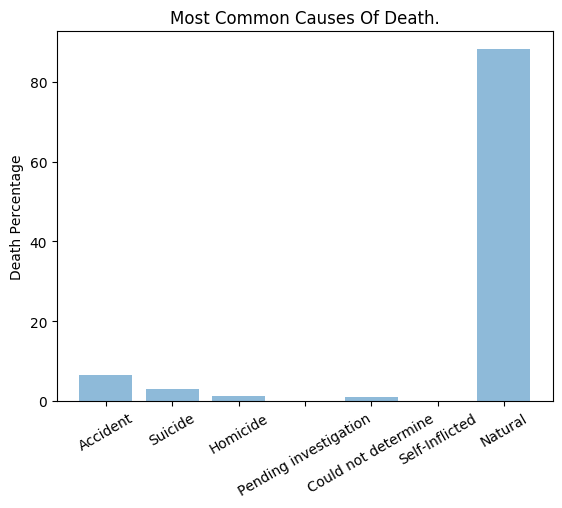

In [187]:

objects = ('Accident', 'Suicide', 'Homicide', 'Pending investigation', 'Could not determine', 'Self-Inflicted', 'Natural')
y_pos = np.arange(len(objects))
percentages = [manner1Per, manner2Per, manner3Per, manner4Per, manner5Per, manner6Per, manner7Per]

plt.bar(y_pos, percentages, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation=30)
plt.ylabel('Death Percentage')
plt.title('Most Common Causes Of Death.')
#plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right', fontsize='x-small')
plt.show();

### Life expectancy for certain age groups

In [189]:
df.columns

Index(['Resident_Status', 'Month_Of_Death', 'Sex', 'Age_Key', 'Age_Value',
       'Age_Recode_52', 'Age_Recode_27', 'Age_Recode_12',
       'Infant_Age_Recode_22', 'Place_Of_Death', 'Marital_Status',
       'DOW_of_Death', 'Data_Year', 'Injured_At_Work', 'Manner_Of_Death',
       'Method_Of_Disposition', 'Autopsy', 'Activity_Code',
       'Place_Of_Causal_Injury', 'ICD10', 'Cause_Recode_358',
       'Cause_Recode_113', 'Infant_Cause_Recode_130', 'Cause_Recode_39',
       'Entity_Axis_Conditions', 'EAC1', 'EAC2', 'EAC3', 'EAC4', 'EAC5',
       'EAC6', 'EAC7', 'EAC8', 'EAC9', 'EAC10', 'EAC11', 'EAC12', 'EAC13',
       'Record_Axis_Conditions', 'RA1', 'RA2', 'RA3', 'RA4', 'RA5', 'RA6',
       'RA7', 'RA8', 'RA9', 'RA10', 'RA11', 'RA12', 'RA13', 'Race',
       'Race_Bridged', 'Race_Imputation', 'Race_Recode_3', 'Race_Recode_5',
       'Hispanic_Origin', 'Hispanic_Origin_Recode'],
      dtype='object')

In [215]:
ageLT10 = df[df.Age_Value < 10].shape[0]
ageLT20 = df[(df.Age_Value >= 10) & (df.Age_Value < 20)].shape[0]
ageLT30 = df[(df.Age_Value >= 20) & (df.Age_Value < 30)].shape[0]
ageLT40 = df[(df.Age_Value >= 30) & (df.Age_Value < 40)].shape[0]
ageLT50 = df[(df.Age_Value >= 40) & (df.Age_Value < 50)].shape[0]
ageLT60 = df[(df.Age_Value >= 50) & (df.Age_Value < 60)].shape[0]
ageLT70 = df[(df.Age_Value >= 60) & (df.Age_Value < 70)].shape[0]
ageLT80 = df[(df.Age_Value >= 70) & (df.Age_Value < 80)].shape[0]
ageLT90 = df[(df.Age_Value >= 80) & (df.Age_Value < 90)].shape[0]
ageLT100 = df[(df.Age_Value >= 90) & (df.Age_Value < 100)].shape[0]
ageGTE100 = df[df.Age_Value >= 100].shape[0]

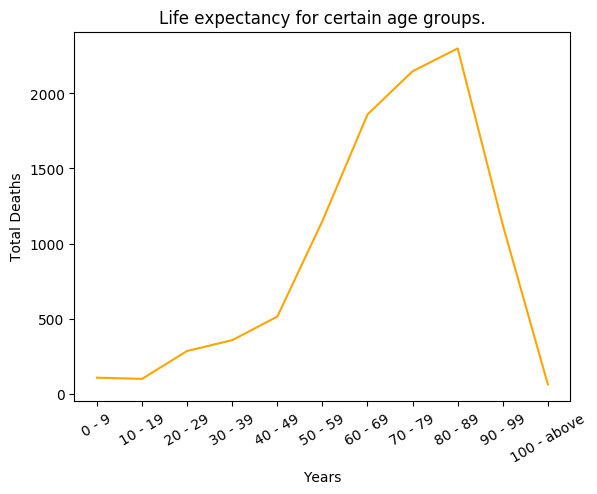

In [216]:
year = ['0 - 9', '10 - 19', '20 - 29', '30 - 39', '40 - 49', '50 - 59', '60 - 69', '70 - 79', '80 - 89', '90 - 99', '100 - above']
numberOfDeaths = [ageLT10, ageLT20, ageLT30, ageLT40, ageLT50, ageLT60, ageLT70, ageLT80, ageLT90, ageLT100, ageGTE100]
plt.plot(year, numberOfDeaths, color='orange')
plt.xticks(rotation=30)
plt.xlabel('Years')
plt.ylabel('Total Deaths')
plt.title('Life expectancy for certain age groups.')
plt.show()